In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
element = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

In [6]:
def skeletonize(image):
    size = np.size(image)
    skeleton = np.zeros(image.shape, np.uint8)

    ret, image = cv2.threshold(image,   127,   255,   0)

    done = False
    while not done:
        eroded = cv2.erode(image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        image = eroded.copy()

        zeros = size - cv2.countNonZero(image)
        if zeros == size:
            done = True

    return skeleton


In [7]:
def reconstruct(skeleton, iterations=10):
    reconstruction = np.zeros(skeleton.shape, np.uint8)

    for _ in range(iterations):
        dilated = cv2.dilate(skeleton, element)
        eroded = cv2.erode(dilated, element)
        reconstruction = cv2.bitwise_or(reconstruction, eroded)
        skeleton = eroded.copy()

    return reconstruction

In [8]:

image = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)
skel = skeletonize(image)
rec = reconstruct(image)

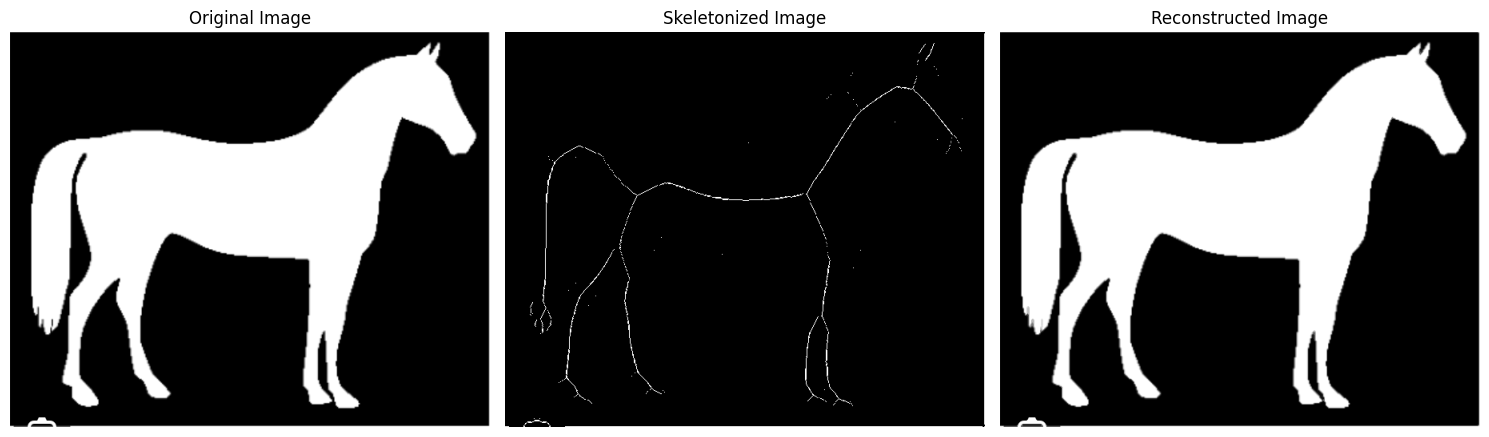

In [9]:
fig, axes = plt.subplots(1,  3, figsize=(15,  5))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized Image')
axes[1].axis('off')

axes[2].imshow(rec, cmap=plt.cm.gray)
axes[2].set_title('Reconstructed Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [10]:
element = np.array([[1, 1, 0],
                    [0, 1, 0],
                    [0, 1, 1]], dtype=np.uint8)

In [11]:
image = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)
skel = skeletonize(image)
rec = reconstruct(image)

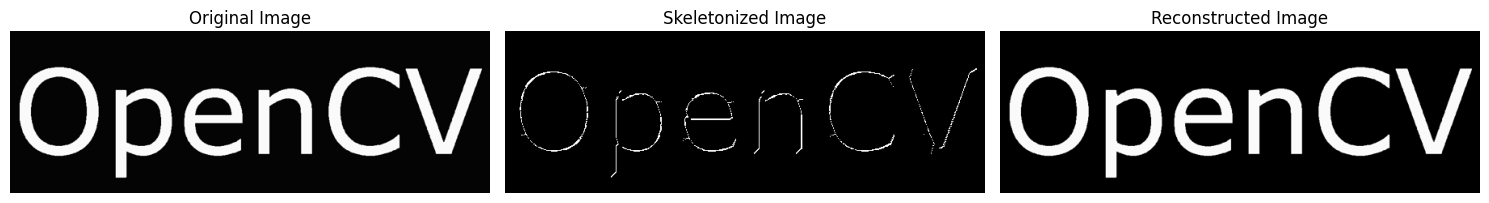

In [12]:
fig, axes = plt.subplots(1,  3, figsize=(15,  5))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized Image')
axes[1].axis('off')

axes[2].imshow(rec, cmap=plt.cm.gray)
axes[2].set_title('Reconstructed Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [14]:
element = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]], dtype=np.uint8)

In [15]:
image = cv2.imread("image3.png", cv2.IMREAD_GRAYSCALE)
skel = skeletonize(image)
rec = reconstruct(image)

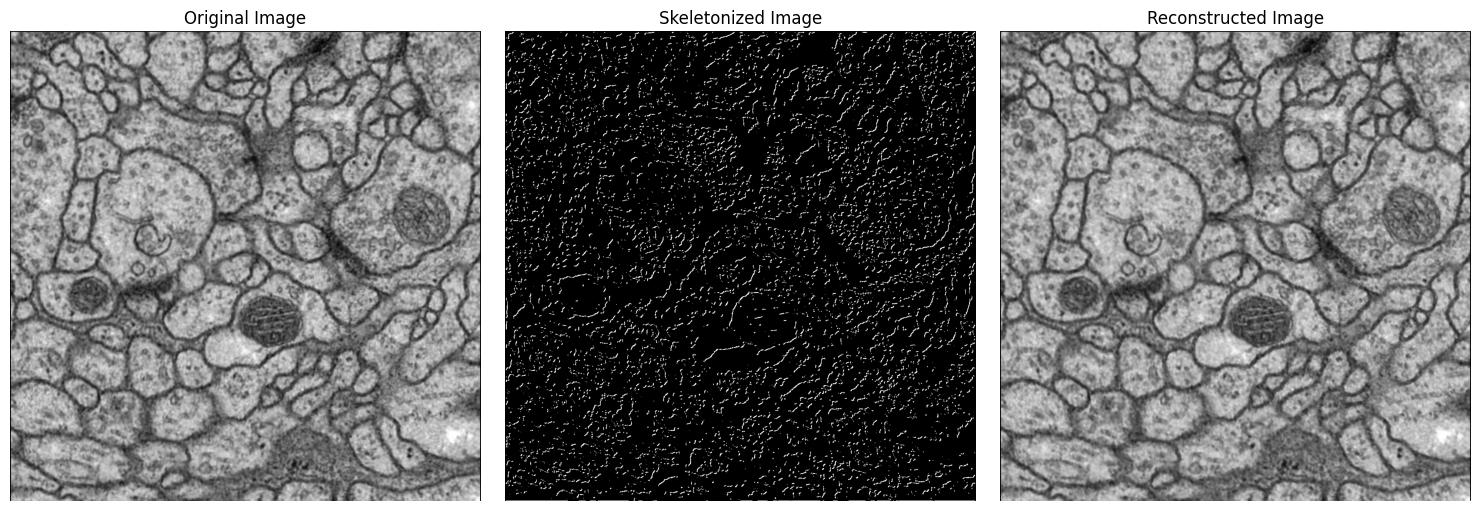

In [16]:
fig, axes = plt.subplots(1,  3, figsize=(15,  5))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized Image')
axes[1].axis('off')

axes[2].imshow(rec, cmap=plt.cm.gray)
axes[2].set_title('Reconstructed Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()